# Figure 3B

In [1]:
import os
import random
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
def plot_create():
    plt.title('Predicted clone velocities', y=1.05, size=30)
    plt.xlabel('AP position' + ' (' + r'$\mu$'+'m)')
    plt.ylabel('Velocity' + ' (' + r'$\mu$'+'m/day)')
    fig.set_size_inches(18.5, 12.5)
    plt.rcParams.update({'font.size': 32})
    filename = "../../Plots/" + "Fig_3B.png"    
    fig.savefig(filename, dpi=300)

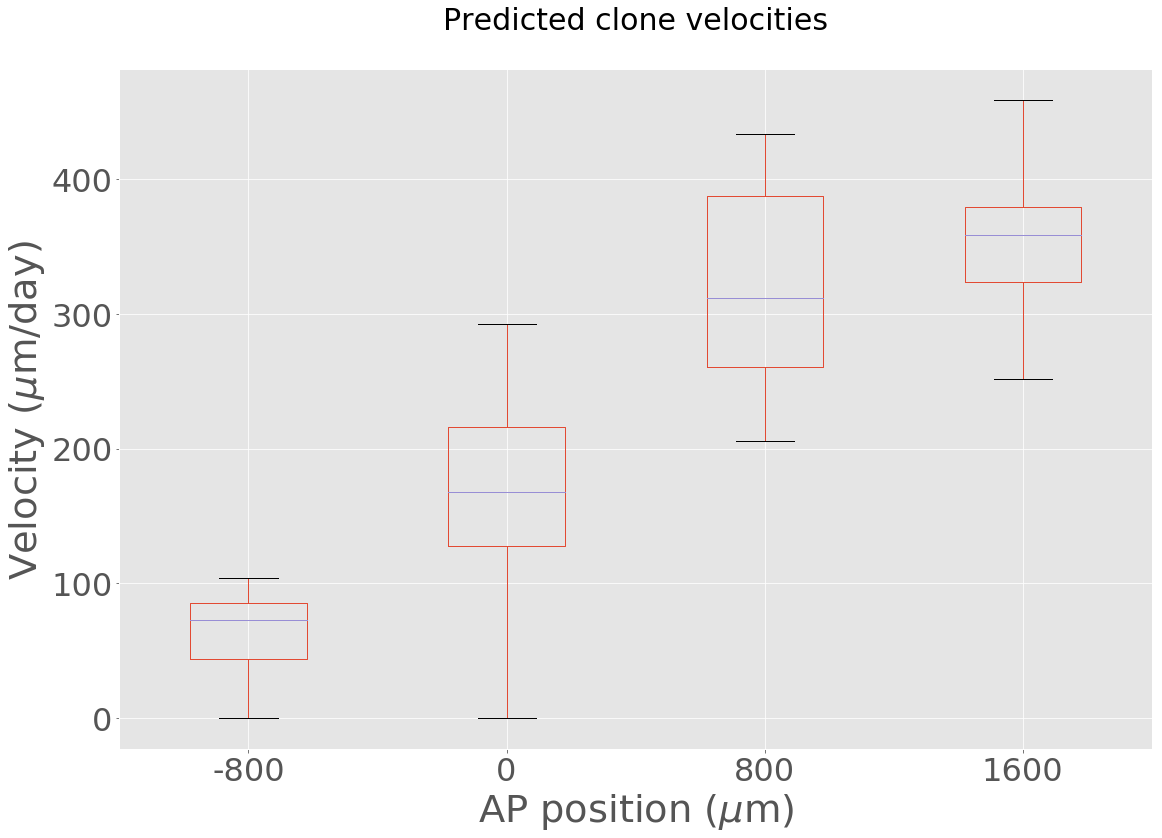

In [4]:
root = '../../Simulations/Models/Shrink-Shrink/n0=205_rl=-1045_tv=44/Trajectories'

times = range(0,8*24+1) 
clones_pos = np.arange(122,205+1,2)
bins = np.arange(-1200, 2800, 800)

files = os.listdir(root)
ordered_files = sorted(files)

velocities = []
for clon, file in zip(clones_pos,ordered_files):
        velocities_bins = []
        opened_file = open(root+"/"+file)
        df0 = pd.read_csv(opened_file, delimiter=',')
        cells = df0['positions']
        clones_pos_t = []
        for t in times:
            cells_clean = np.asarray(cells[t].split("]")[0].split()[1:]).astype(np.float)
            positions = np.argwhere(cells_clean==clon)[0][0]
            clones_pos_t.append(((positions-205)*13.2).mean())
        clones_pos_t = np.asarray(clones_pos_t)
        digitized = np.digitize(clones_pos_t, bins)
        for j in range(1, len(bins)):
            if len(clones_pos_t[digitized==j]) != 0:
                slope, intercept, r_value, p_value, std_err = stats.linregress(np.arange(0, len(clones_pos_t[digitized==j])),clones_pos_t[digitized==j])
                velocities_bins.append(slope)
            else:
                velocities_bins.append(np.nan)
        velocities.append(velocities_bins)

fig = plt.figure()
ax = fig.add_subplot(111)

df = pd.DataFrame(np.asarray(velocities)*24)
bp = df.boxplot()

plt.xticks([1,2,3,4],[-800,0,800,1600])

plot_create()